In [13]:
import basic_help
import numpy as np
import matplotlib.pyplot as plt


In [2]:
my_burst = basic_help.Burst()

In [3]:
my_burst.name = 'old_gdo'

In [4]:
#!wget https://gitlab.com/jumson/sdr-samples/raw/master/garage_door_opener/gdo_315_8000000_1

In [5]:
my_burst.center_freq = 315e6
my_burst.samp_rate = 8e6
my_burst.offset = 0
my_burst.raw_input_file = './gdo_315_8000000_1'    # 597MB

In [ ]:
# took 48.2 seconds for 597MB file
# filter_raw is using gnuradio blocks
my_burst = basic_help.filter_raw(my_burst)
my_burst.raw_input_file
# produced 20.6 MB file

In [6]:
my_burst.raw_input_file = './gdo_315_8000000_1filtered'

In [7]:
my_burst = basic_help.slice_ook(my_burst)
my_burst.demodulated_output

'./gdo_315_8000000_1filtered.sliced'

In [8]:
my_burst.samp_rate = my_burst.working_samp_rate
my_burst.duration()

3.31392 seconds


In [12]:
dat_sliced = np.fromfile(my_burst.demodulated_output, dtype="float32")
sliced_bool = np.array(dat_sliced,np.bool)
my_burst.slices = basic_help.Slices(burst=sliced_bool,samp_rate=my_burst.samp_rate)

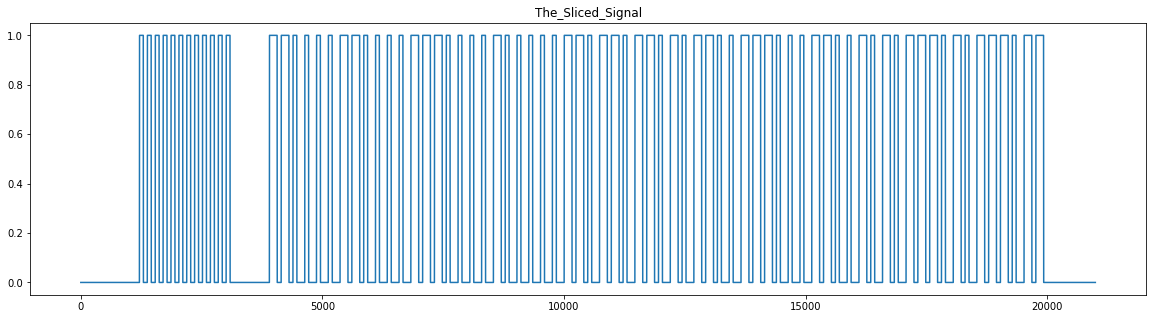

In [16]:
lefty = 460000
righty = lefty + 21000
basic_help.plot_slice(my_burst.slices.burst[lefty:righty])




In [17]:
auto_thresh = ((np.amax(my_burst.data_arr).real+np.abs(np.amin(my_burst.data_arr).real))/2)/2

In [18]:
auto_thresh

0.52728736400604248

In [19]:
breaks = np.where( np.abs(my_burst.data_arr) > auto_thresh )[0]
breaks

array([ 461213,  461214,  461215, ..., 1325488, 1325489, 1325490])

In [20]:
# trying to detect the edges of the bursts
longs = []
small_short_pulse = .0002 # 200 microseconds
preamble_pause = .004 # 4 milliseconds? 20 sympls?
width = my_burst.samp_rate * preamble_pause # 1600 for 8e6 samp_rate
next_break = np.roll(breaks,-1)
bursted = False
len(breaks)

    
        
        

107585

In [21]:
for cur,nex in zip(breaks,next_break):
    distance_to_next_thresh = nex - cur
    if distance_to_next_thresh < width and not bursted:
        longs.append(cur)
        bursted = True
    if distance_to_next_thresh > width:
        longs.append(cur)
        bursted = False
        continue

In [30]:
longs_next = np.roll(longs,-1)
counter = 0
for left,right in zip(longs[::2],longs_next[::2]):
    if left < right:
        slice_filename = './sliced_from_'+str(left)+'_'+str(right)+'.complex64'
        #basic_help.plot_spec(data=np.abs(my_burst.data_arr)[left:right],samp_rate=my_burst.samp_rate,cent_freq=my_burst.center_freq,name=title)
        my_burst.data_arr[left:right].astype('complex64').tofile(slice_filename)
        my_burst.raw_input_file = slice_filename
        my_burst.slices = basic_help.Slices(burst=np.array(np.fromfile(basic_help.slice_ook(my_burst).demodulated_output, dtype="float32"),np.bool),samp_rate=my_burst.samp_rate)
        my_slices = basic_help.get_symbols(basic_help.get_discriminators(my_burst.slices))
        print(my_slices.symbols)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

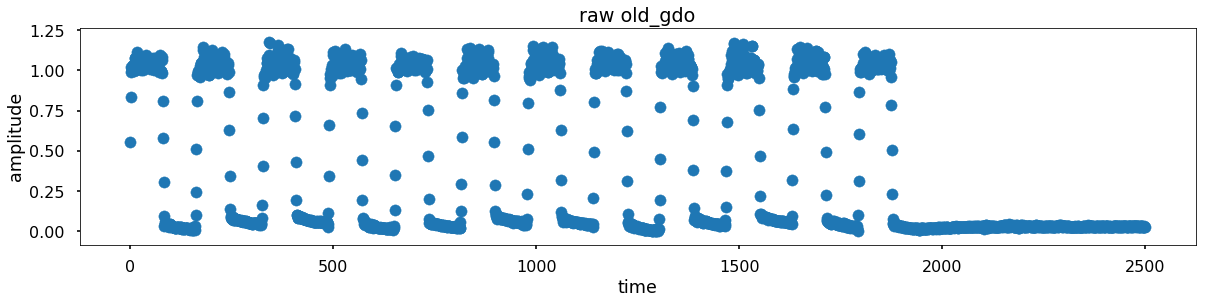

In [17]:
plt.figure(figsize=(20,4))
plt.title("raw "+my_burst.name)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.style.use('seaborn-poster')
left = longs[0]
right = left + 2500 #longs[1] # longs[len(longs)-1]  #left + 20000
jump = 1
time = range(len(np.abs(my_burst.data_arr)[left:right:jump]))
#data = my_burst.data_arr.real[107217:464069]
data = np.abs(my_burst.data_arr)[left:right:jump]
plt.scatter(time,data)
plt.show() 

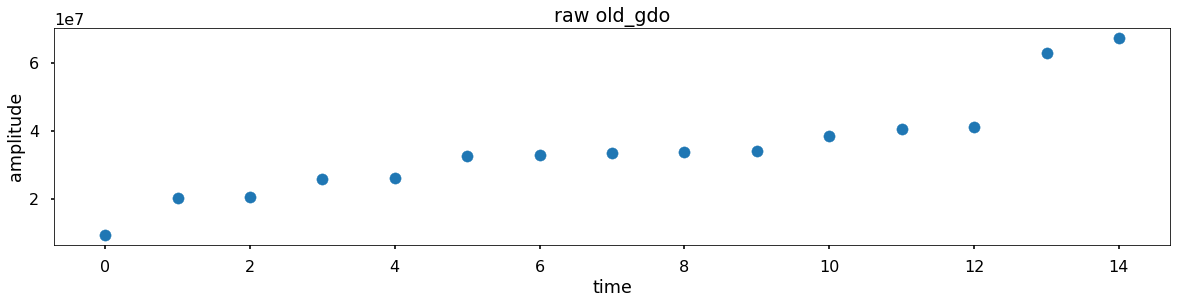

In [17]:
plt.figure(figsize=(20,4))
plt.title("raw "+my_burst.name)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.style.use('seaborn-poster')
#left = longs
#right = left + 30000
time = range(len(longs))
#data = my_burst.data_arr.real[107217:464069]
data = longs
plt.scatter(time,data)
plt.show() 

./sliced_from_461213_479928.complex64.sliced


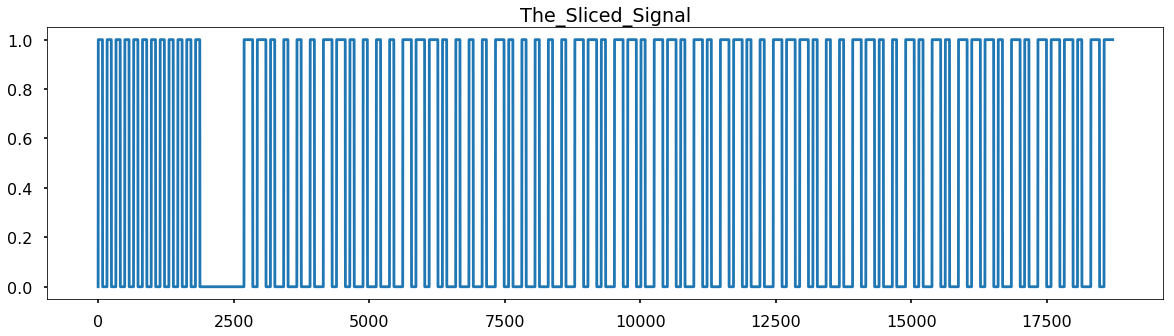

In [27]:
my_burst.raw_input_file = './sliced_from_461213_479928.complex64'
my_burst = basic_help.slice_ook(my_burst)
print(my_burst.demodulated_output)
dat_sliced = np.fromfile(my_burst.demodulated_output, dtype="float32")
sliced_bool = np.array(dat_sliced,np.bool)
my_burst.slices = basic_help.Slices(burst=sliced_bool,samp_rate=my_burst.samp_rate)
lefty = 0
righty = lefty + len(my_burst.slices.burst)
basic_help.plot_slice(my_burst.slices.burst[lefty:righty])

In [28]:
my_slices = basic_help.get_discriminators(my_burst.slices)
print(my_slices.ones_threshold,my_slices.zeros_threshold)
print(my_slices.transitions)
print(my_slices.burst_ends)

119.0 448.0
[    0    80   163   243   327   407   490   570   653   733   816   896
   979  1059  1142  1222  1305  1385  1469  1549  1632  1712  1795  1875
  2690  2850  2934  3094  3178  3257  3422  3501  3665  3745  3909  3989
  4153  4314  4397  4558  4642  4722  4886  4966  5130  5210  5374  5454
  5618  5778  5862  6022  6106  6266  6350  6429  6595  6674  6839  6918
  7083  7162  7327  7487  7571  7650  7814  7894  8058  8138  8302  8382
  8547  8627  8791  8952  9035  9195  9279  9359  9523  9683  9767  9927
 10011 10090 10255 10415 10500 10660 10744 10823 10988 11148 11232 11311
 11476 11636 11720 11880 11963 12043 12207 12287 12452 12613 12696 12857
 12940 13100 13184 13264 13428 13508 13672 13751 13916 14076 14160 14320
 14405 14484 14649 14728 14893 15053 15137 15216 15381 15541 15625 15704
 15868 16029 16112 16273 16357 16518 16601 16681 16845 17006 17089 17169
 17333 17493 17577 17737 17821 17981 18065 18144 18310 18470 18554]
[0, 18554]


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]


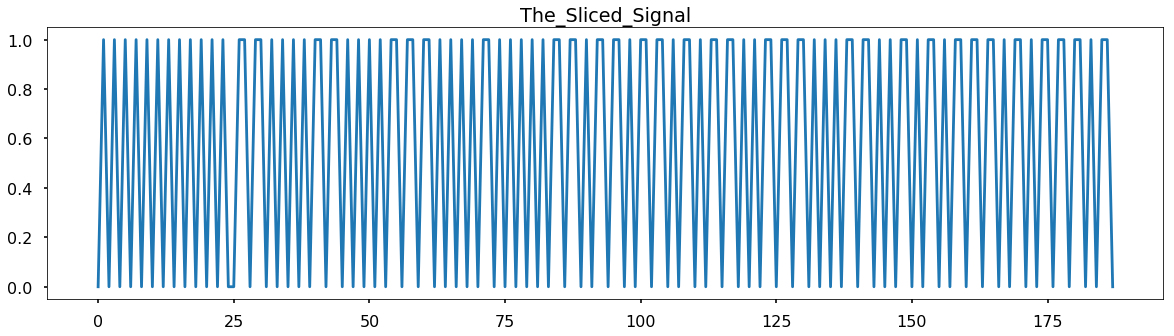

In [29]:
my_slices = basic_help.get_symbols(my_slices)
print(my_slices.symbols)
basic_help.plot_slice(my_slices.symbols)